## Study Case

Tim marketing meminta anda sebagai Marketing Researcher untuk meneliti apa yang menyebabkan seseorang tertarik untuk merespon marketing campaign yang sudah dibuat oleh mereka. Insight yang dihasilkan nanti rencananya akan digunakan untuk membuat strategi marketing yang tepat di masa mendatang.
Data yang anda peroleh memiliki metadata sebagai berikut:
* ID: User ID
* Year_Birth: Tahun lahir
* Education: Tingkat pendidikan
* Marital_Status: Status pernikahan
* Income: Besar pendapatan tahunan
* Kidhome: Jumlah anak
* Teenhome: Jumlah anak remaja
* Dt_Customer: Tanggal mereka menjadi customer
* Recency: Jumlah hari terhitung sejak transaksi terakhir
* MntX: Jumlah spending untuk produk X dalam 2 tahun terakhir
* NumDealsPurchases: Jumlah transaksi yang menggunakan voucher
* NumWebPurchases: Jumlah transaksi via web
* NumCatalogPurchases: Jumlah transaksi menggunakan katalog
* NumStorePurchases: Jumlah transaksi langsung di toko
* NumWebVisitMonth: Jumlah kunjungan online dalam 1 bulan terakhir
* AcceptedCmpX: Apakah customer menerima penawaran pada campaign ke-X?
Bernilai 1 jika ya
* Response (target): Apakah customer menerima penawaran terakhir? Bernilai 1
jika ya

1.   Anda merasa yakin bahwa untuk mengetahui faktor apa saja yang dapat
mempengaruhi seseorang untuk merespon suatu campaign dapat diekstrak
langsung dari data tanpa harus membuat model. Analisisnya secara deskriptif
(EDA) apa saja faktor yang membuat seseorang merespon campaign dari tim
marketing. Berikan penjelasan dan alasan mengapa variabel tertentu berasosiasi dengan variabel target (Response)
2.   Dengan begitu banyaknya faktor yang mempengaruhi seseorang untuk merespon campaign, anda berpikir bahwa akan lebih baik menggunakan model machine learning untuk menjelaskan dampak dari tiap variabel sehingga dapat diketahui variabel mana yang memiliki pengaruh terbesar.

a. Buatlah model machine learning untuk masalah campaign marketing
berikut baik menggunakan variabel yang anda pilih pada poin 1 maupun
menggunakan semua variabel yang anda miliki dengan aturan:
> i. Selalu menggunakan model baseline (logistic regression, KNN,
Naive Bayes) sebagai pembanding untuk model yang lebih
kompleks

> ii. Seleksi model terbaik dari sekian banyak model yang anda
gunakan

> iii. Interpretasikan hasil dari model sesuai dengan jenis masing-masing
model

b. Berikan rekomendasi yang berdasarkan hasil interpretasi dari model
terbaik









## Install and Load Package

In [ ]:
!pip install skope-rules
!pip install eli5
!pip install scikit-plot
!pip install matplotlib

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:
# import pandas for data wrangling
import pandas as pd
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# load linear regression model
from sklearn.linear_model import LinearRegression
# load logistic regression model
from sklearn.linear_model import LogisticRegression
# Lload k-nearest neighbors model
from sklearn.neighbors import KNeighborsClassifier
# load decision tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
# load random forest model
from sklearn.ensemble import RandomForestClassifier
# load naive bayes
from sklearn.naive_bayes import GaussianNB
# import seaborn for data visualization
import seaborn as sns

# load statsmodel module 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# load rulefit model
from skrules import SkopeRules

# load scikit-plot modules
import scikitplot as skplt

# load eli5
import eli5

## Pre-Processing Data

In [ ]:
# load customer dataset
data = pd.read_csv('https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/marketing_campaign_response_model/marketing_campaign.csv', sep=';')

In [ ]:
# typecasting data
data['Dt_Customer']= data.Dt_Customer.astype('datetime64[ns]')

In [ ]:
# Unique Value for Object Columns
empDfObj = pd.DataFrame(data, columns=['Education', 'Marital_Status'])
print("Contents of the Dataframe : ")
print(empDfObj)

# Get a series object containing the count of unique elements
# in each column of dataframe
uniqueValues = empDfObj.nunique()
print('Count of unique value sin each column :')
print(uniqueValues)

# Get unique elements in multiple columns i.e. Name & Age
unique = (empDfObj['Education'].append(empDfObj['Marital_Status'])).unique()
print('Unique elements in column "Education" & "Marital_Status" :')
print(unique)

Contents of the Dataframe : 
       Education Marital_Status
0     Graduation         Single
1     Graduation         Single
2     Graduation       Together
3     Graduation       Together
4            PhD        Married
...          ...            ...
2235  Graduation        Married
2236         PhD       Together
2237  Graduation       Divorced
2238      Master       Together
2239         PhD        Married

[2240 rows x 2 columns]
Count of unique value sin each column :
Education         5
Marital_Status    8
dtype: int64
Unique elements in column "Education" & "Marital_Status" :
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle' 'Single' 'Together'
 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [ ]:
# Marital Status Encoding
# Change to 1 for All Value with Partner (Together and Married) and 0 for All Value Without Partner (Single, Divorced, Widow, Alone, Absurd, YOLO)
data['Marital_Status'] = data['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner','Divorced':'Single','Widow':'Single','Alone':'Single','Absurd':'Single','YOLO':'Single'});

# Education Encoding
# Change to 1 for All Value with University Graduated (Graduation, PhD, Master, 2n Cycle) and 0 for Non University Graduated (Basic)
data['Education'] = data['Education'].replace({'Graduation':'Graduated','PhD':'Graduated','Master':'Graduated','2n Cycle':'Graduated'});

In [ ]:
# Marital Status Encoding to int64
# Change to 1 for All Value with Partner (Together and Married) and 0 for All Value Without Partner (Single, Divorced, Widow, Alone, Absurd, YOLO)
data['Marital_Status'] = data['Marital_Status'].replace({'Partner':1,'Single':0});

# Education Encoding to int64
# Change to 1 for All Value with University Graduated (Graduation, PhD, Master, 2n Cycle) and 0 for Non University Graduated (Basic)
data['Education'] = data['Education'].replace({'Graduated':1,'Basic':0});

In [ ]:
# Create Total Values Columns

# Age and Drop Year_Birth (Data Collected in January 2015)
data['Age'] = 2021 - data['Year_Birth']

# Make A Column with Value of Total Child and Teen at Home and Drop Another Columns
data['Children'] = data['Kidhome'] + data ['Teenhome']

# Make A Column with Value of All Spendings and Drop Another Columns
data['Total_Spendings'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

# Make A Column woth Value of Total Purchases and Drop Another Columns
data['Total_Purchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']

In [ ]:
# removes row with na values
data = data.dropna()
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
Children               0
Total_Spendings        0
Total_Purchases        0
dtype: int64

In [ ]:
# Drop Unused Data
data = data.drop(['ID','Dt_Customer','Year_Birth'], axis=1)

# Drop Data with only One Value
data = data.drop(['Z_CostContact','Z_Revenue','Complain'], axis=1)

# Drop Data with Values Has Been Sum Up
data = data.drop(['Kidhome','Teenhome','MntWines','MntFruits','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth'], axis=1)

In [ ]:
data

,Education,Marital_Status,Income,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,Children,Total_Spendings,Total_Purchases
0,1,0,58138.0,58,0,0,0,0,0,1,64,0,1617,22
1,1,0,46344.0,38,0,0,0,0,0,0,67,2,27,4
2,1,1,71613.0,26,0,0,0,0,0,0,56,0,776,20
3,1,1,26646.0,26,0,0,0,0,0,0,37,1,53,6
4,1,1,58293.0,94,0,0,0,0,0,0,40,1,422,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1,1,61223.0,46,0,0,0,0,0,0,54,1,1341,16
2236,1,1,64014.0,56,0,0,0,1,0,0,75,3,444,15
2237,1,0,56981.0,91,0,1,0,0,0,0,40,0,1241,18
2238,1,1,69245.0,8,0,0,0,0,0,0,65,1,843,21


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Education        2216 non-null   int64  
 1   Marital_Status   2216 non-null   int64  
 2   Income           2216 non-null   float64
 3   Recency          2216 non-null   int64  
 4   AcceptedCmp3     2216 non-null   int64  
 5   AcceptedCmp4     2216 non-null   int64  
 6   AcceptedCmp5     2216 non-null   int64  
 7   AcceptedCmp1     2216 non-null   int64  
 8   AcceptedCmp2     2216 non-null   int64  
 9   Response         2216 non-null   int64  
 10  Age              2216 non-null   int64  
 11  Children         2216 non-null   int64  
 12  Total_Spendings  2216 non-null   int64  
 13  Total_Purchases  2216 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 259.7 KB


## Train-Test Split

In [ ]:
# assign 'Response' column to y 
y = data['Response'].values
# assign all columns except 'Response' to X
x = data.drop(['Response'], axis = 1).values

In [ ]:
# check y dimension
y.shape

(2216,)

In [ ]:
# check X dimension
x.shape

(2216, 13)

In [ ]:
# split data to train and test data
# with test size is 30% of overall data
# use stratified sampling
# and set RNG to 1000
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.3,
    stratify = y,
    random_state = 1000
)

In [ ]:
# Check X_train_Response dimension
x_train.shape

(1551, 13)

In [ ]:
# check y_train_Response class distribution
np.unique(y_train, return_counts=True)[1]

array([1318,  233])

In [ ]:
# check X_test_Response dimension
x_test.shape

(665, 13)

In [ ]:
# check y_test_Response class distribution
np.unique(y_test, return_counts=True)[1]

array([565, 100])

## Simple Explanatory Data Analysis

#### **Numerical Data Distribution and Correlation**

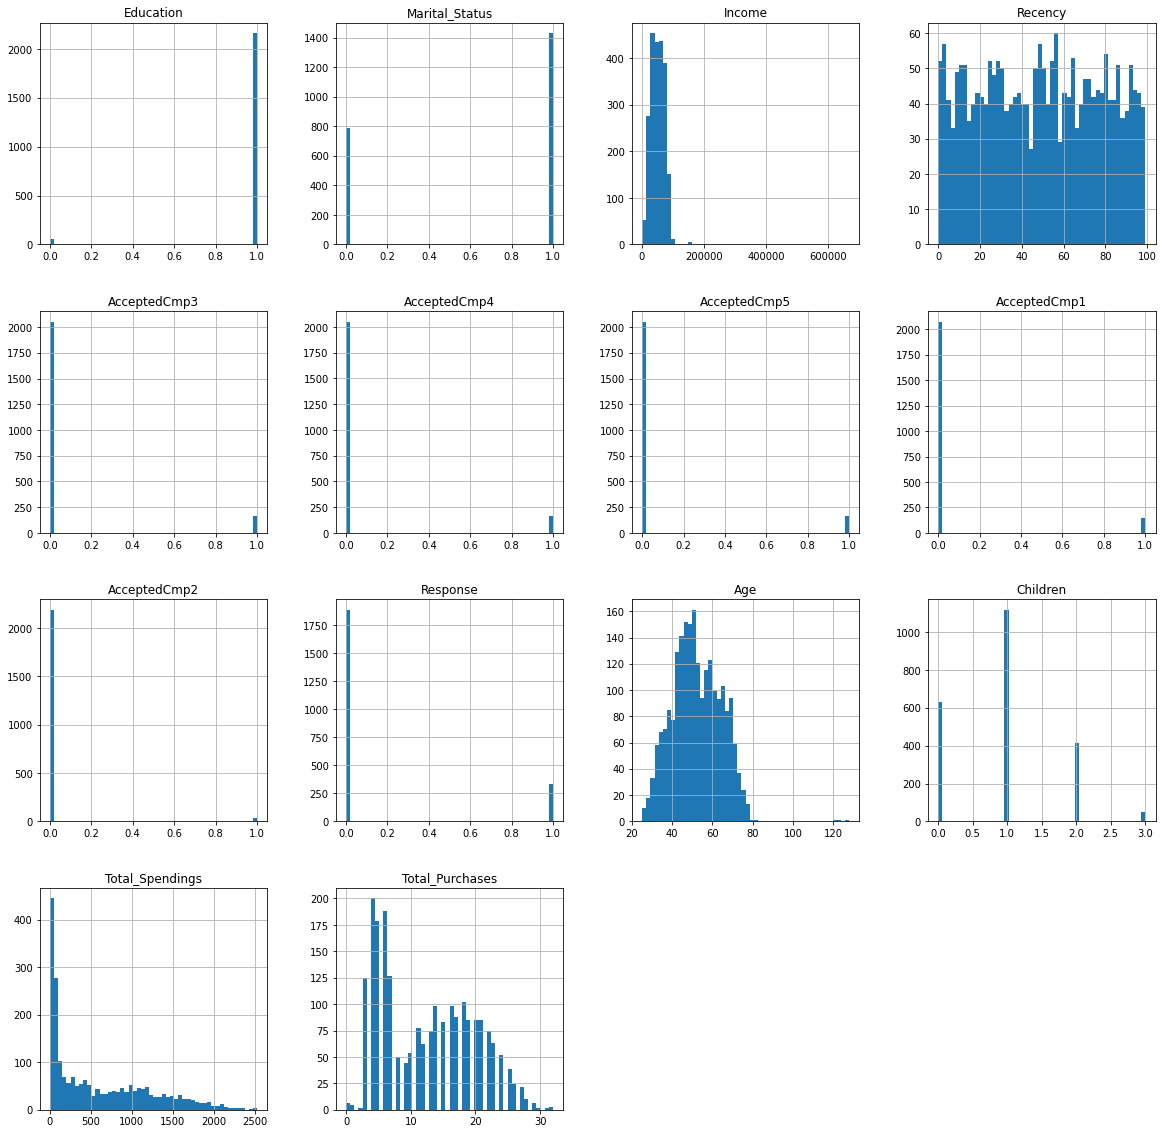

In [ ]:
# check numerical data distribution
data.hist(bins=50, figsize = (20, 20));

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



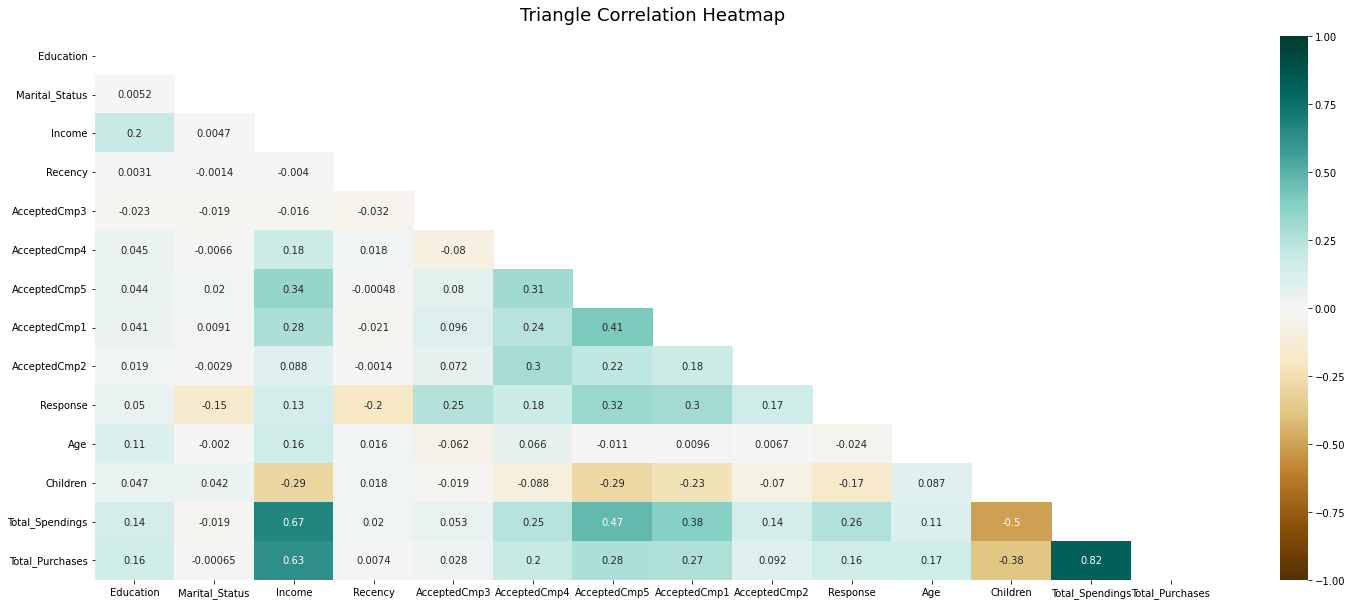

In [ ]:
# Increase the size of the heatmap
plt.figure(figsize=(25, 10))

# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Berdasarkan hasil dari *Explanatory Data Analysis* menunjukkan bahwa data Response pada analisis univariat hanya bernilai 0 atau 1 yang menandakan bahwa faktor respon pada kustomer hanya memiliki keputusan ya (bernilai 1) atau tidak (bernilai 0). Namun, saat dianalisis menggunakan matriks korelasi didapatkan bahwa faktor yang membuat seseorang merespon campaign dari tim
marketing (Response) ini memiliki nilai korelasi tertinggi dengan faktor kustomer yang menerima penawaran pada campaign ke-5 (AcceptedCmp5) sebesar 32,6%. Selain itu, faktor lain yang membuat seseorang merespon campaign dari tim marketing antara lain kustomer yang menerima penawaran pada campaign ke sekian kali (AcceptedCmpX), jumlah spending untuk produk X dalam 2 tahun terakhir (MntX) dan seluruh jumlah transaksi dari berbagai cara pembayaran. Faktor-faktor ini yang memiliki nilai korelasi positif terhadap Response.


#### **Target Class Distribution of Response**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



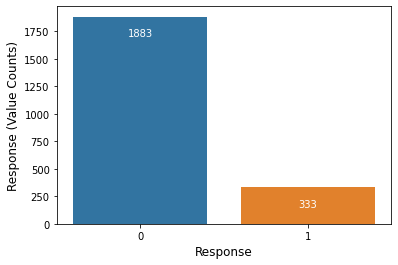

In [ ]:
# Plot the graph
ax=sns.countplot(data['Response']);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white')

plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Response", fontsize=12)
plt.ylabel("Response (Value Counts)", fontsize=12);

In this graph, the response data is too imbalance.

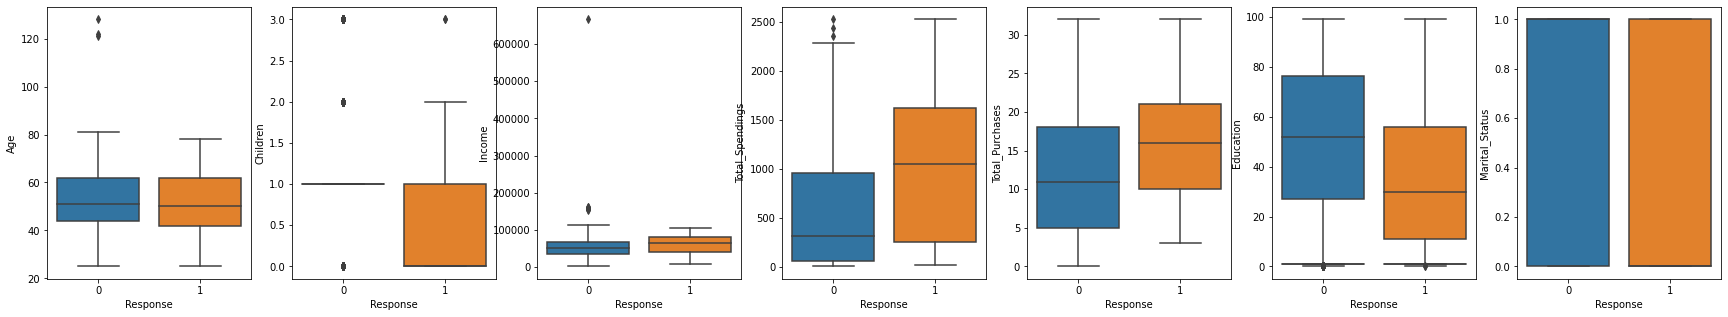

In [ ]:
# Relationship Between Response and Many Variables
fig, axis = plt.subplots(1,7, figsize=(30,5))

ax = sns.boxplot(x=data['Response'], y=data['Age'], data=data, ax=axis[0])
ax = sns.boxplot(x=data['Response'], y=data['Children'], data=data, ax=axis[1])
ax = sns.boxplot(x=data['Response'], y=data['Income'], data=data, ax=axis[2])
ax = sns.boxplot(x=data['Response'], y=data['Total_Spendings'], data=data, ax=axis[3])
ax = sns.boxplot(x=data['Response'], y=data['Total_Purchases'], data=data, ax=axis[4])
ax = sns.boxplot(x=data['Response'], y=data['Recency'], data=data, ax=axis[5])
ax = sns.boxplot(x=data['Response'], y=data['Education'], data=data, ax=axis[5])
ax = sns.boxplot(x=data['Response'], y=data['Marital_Status'], data=data, ax=axis[6])

#### **Target Class Distribution of Education**

In [ ]:
import plotly.express as px

fig = px.pie(data['Education'], values=data['Education'].value_counts().values, names=data['Education'].value_counts().index)
fig.update_traces(textposition='inside', textinfo='value+percent+label', marker=dict(line=dict(color='white', width=2)))
fig.show()

In this graph, the response data is too imbalance.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



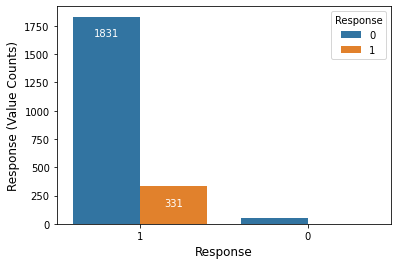

In [ ]:
# Between Education and Response
ax = sns.countplot(data['Education'], hue=data['Response'], order =data['Education'].value_counts().index)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white')

plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Response", fontsize=12)
plt.ylabel("Response (Value Counts)", fontsize=12);

#### **Target Class Distribution of Marital Status**

In [ ]:
import plotly.express as px

fig = px.pie(data['Marital_Status'], values=data['Marital_Status'].value_counts().values, names=data['Marital_Status'].value_counts().index)
fig.update_traces(textposition='inside', textinfo='value+percent+label', marker=dict(line=dict(color='white', width=2)))
fig.show()

In this graph, the response data is too imbalance.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



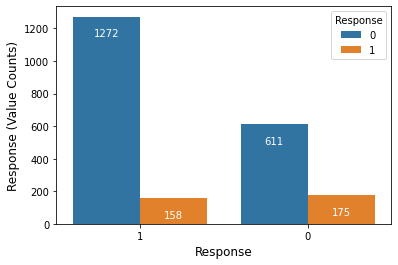

In [ ]:
# Between Marital Status and Response
ax = sns.countplot(data['Marital_Status'], hue=data['Response'], order =data['Marital_Status'].value_counts().index)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white')

plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Response", fontsize=12)
plt.ylabel("Response (Value Counts)", fontsize=12);

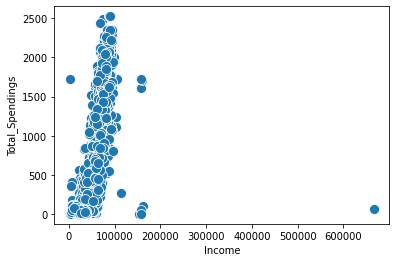

In [ ]:
# Income and Spendings Relationship
plt.figure()
sns.scatterplot(x=data['Income'], y=data['Total_Spendings'], s=100);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

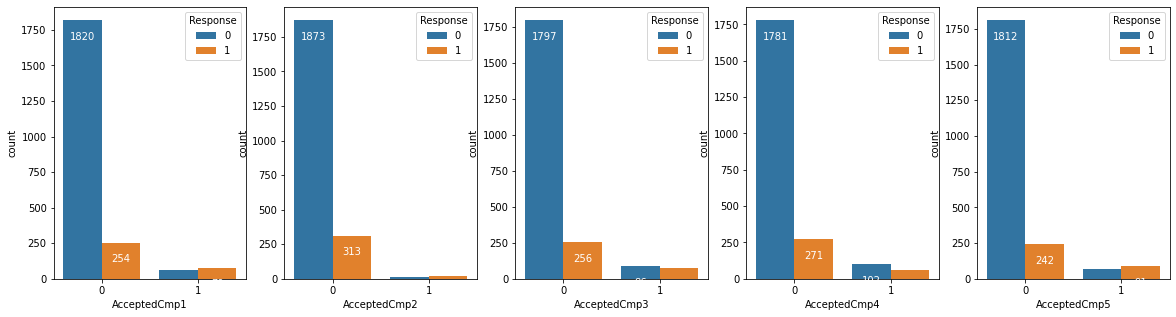

In [ ]:
# Between AcceptedCmpX and Response
fig, axis = plt.subplots(1,5, figsize=(20,5))

ax = sns.countplot(data['AcceptedCmp1'], hue=data['Response'], ax=axis[0])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white')
ax = sns.countplot(data['AcceptedCmp2'], hue=data['Response'], ax=axis[1])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white')
ax = sns.countplot(data['AcceptedCmp3'], hue=data['Response'], ax=axis[2])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white')
ax = sns.countplot(data['AcceptedCmp4'], hue=data['Response'], ax=axis[3])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white')
ax = sns.countplot(data['AcceptedCmp5'], hue=data['Response'], ax=axis[4])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white')

## Logistics Regression

**Train-Test Split**

In [ ]:
y = data['Response'].values
x = data.drop(['Response'], axis = 1).values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.3,
    stratify = y,
    random_state = 1000
)

In [ ]:
x_train_int = sm.add_constant(x_train)
logistic_reg_sm = sm.Logit(y_train, x_train_int).fit()

Optimization terminated successfully.
         Current function value: 0.293870
         Iterations 7


In [ ]:
# check summary of model
logistic_reg_sm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.305     
Dependent Variable: y                AIC:              939.5855  
Date:               2022-05-16 10:11 BIC:              1014.4386 
No. Observations:   1551             Log-Likelihood:   -455.79   
Df Model:           13               LL-Null:          -656.23   
Df Residuals:       1537             LLR p-value:      1.4638e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const     -1.1168     0.8351   -1.3373   0.1811   -2.7535    0.5200
x1         1.0557     0.7776    1.3576   0.1746   -0.4684    2.5798
x2        -1.1901     0.1777   -6.6957   0.0000   -1.5385   -0.8417
x3        -0.0000     0.0000   -3.4488   0.0006   -0.0000   -0.0000
x4        -0.0289     0.0033   -8.6410   0.0000   -0.0354   -0.0223
x5         2.0575     0.2526    8.1466   0.0000    1.5625    2.5525
x6         0.7332     0.2863    2.5610   0.0104    0.1721    1.2944
x7         1.2968     0.3047    4.2553   0.0000    0.6995    1.8941
x8         1.2152     0.3052    3.9818   0.0001    0.6170    1.8133
x9         1.0807     0.6604    1.6365   0.1017   -0.2136    2.3751
x10        0.0010     0.0071    0.1426   0.8866   -0.0130    0.0150
x11       -0.0216     0.1444   -0.1494   0.8812   -0.3047    0.2615
x12        0.0015     0.0003    5.4784   0.0000    0.0010    0.0020
x13       -0.0065     0.0202   -0.3222   0.7473   -0.0461    0.0331
=================================================================

"""

In [ ]:
# check model coefficient
logistic_reg_sm.params

array([-1.11678208e+00,  1.05568778e+00, -1.19011883e+00, -2.65591788e-05,
       -2.88540663e-02,  2.05745517e+00,  7.33231341e-01,  1.29676573e+00,
        1.21516676e+00,  1.08073506e+00,  1.01957180e-03, -2.15815392e-02,
        1.50483806e-03, -6.51394011e-03])

**Modeling using Scikit-Learn**

LogisticRegression param:
```python
sklearn.linear_model.LogisticRegression(
  penalty='l2', *, dual=False, 
  tol=0.0001, C=1.0, 
  fit_intercept=True, intercept_scaling=1, 
  class_weight=None, random_state=None, 
  solver='lbfgs', max_iter=100, 
  multi_class='auto', verbose=0, 
  warm_start=False, n_jobs=None,
  l1_ratio=None
)
```
For further explanation, check: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
# define logistic regression model
logistic_reg = LogisticRegression(random_state=1000)
# fit model to data
logistic_reg.fit(x_train, y_train)

LogisticRegression(random_state=1000)

In [ ]:
# check model coefficient
logistic_reg.coef_

array([[-1.63781811e-04, -3.31205475e-04, -2.70757491e-05,
        -2.77585613e-02,  1.46429300e-04,  8.66435711e-05,
         1.61201048e-04,  1.49809347e-04,  3.83514531e-05,
        -9.72272701e-03, -2.72213185e-04,  1.98943525e-03,
        -1.18001576e-03]])

In [ ]:
logistic_reg.intercept_

array([-0.00020742])

In [ ]:
logistic_reg.score(x_train, y_train)

0.8504190844616376

### Classification Evaluation Metrics

In [ ]:
# predict
pred_result = logistic_reg.predict(X_test)
pred_proba_result = logistic_reg.predict_proba(X_test)

**Accuracy**

$$Accuracy = \frac{True Positive + True Negative}{True Positive + False Positive + True Negative + False Negative}$$

In [ ]:
# check model accuracy
metrics.accuracy_score(y_test, pred_result)

**Confusion Matrix**

In [ ]:
# check confusion matrix
metrics.confusion_matrix(y_test, pred_result)

**Plot Confusion Matrix using Scikit-Plot**

In [ ]:
# visualize confusion matrix using scikit-plot
skplt.metrics.plot_confusion_matrix(y_test, pred_result);

**Precision**

$$Precision = \frac{\text{True Positive}}{\text{True Positve} + \text{False Positive}}$$

In [ ]:
# check model precision
metrics.precision_score(y_test, pred_result)

**Recall**

$$Recall = \frac{\text{True Positive}}{\text{True Positive} + \text{False Negative}}$$

In [ ]:
# check model recall
metrics.recall_score(y_test, pred_result)

**F1-Score**

$$F_{1} = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$

In [ ]:
# check f1_score
metrics.f1_score(y_test, pred_result)

**Classification Report**

In [ ]:
# create classification report
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['Not Response','Response'], output_dict=True))

**ROC-AUC Curve**

$$\text{False Positive Rate} = \frac{\text{False Positive}}{\text{False Positive} + \text{False Negative}}$$

In [ ]:
# generate probability prediction
pred_proba_result = logistic_reg.predict_proba(X_test)

In [ ]:
# check result
pd.DataFrame(pred_proba_result).head()

In [ ]:
# check AUC score
metrics.roc_auc_score(y_test, pred_proba_result[:,1])

In [ ]:
# check first 10 prediction of class 1
pred_proba_result[:10,1]

**ROC Curve**

**ROC Curve Using Scikit-Learn**

In [ ]:
metrics.RocCurveDisplay.from_estimator(logistic_reg, X_test, y_test)

**ROC Curve From Scikit-Plot**

In [ ]:
skplt.metrics.plot_roc(y_test, pred_proba_result)

**Handle Imbalance Class Dataset with G-Means**

$$G_{means} = \sqrt{\text{True Positive Rate} \times \text{(1 - False Positive Rate)}}$$

where

$$\text{True Positive Rate} = \frac{\text{True Positive}}{\text{True Positive} + \text{True Negative}}$$

In [ ]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_proba_result[:,1])

In [ ]:
# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))

In [ ]:
# see gmeans result
gmeans

In [ ]:
# find the best threshold
ix = np.argmax(gmeans)

In [ ]:
print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))

In [ ]:
# change predict proba result to optimized one using new threshold
new_pred_result = (pred_proba_result[:,1] >= thresholds[ix]).astype(int)

In [ ]:
# visualize confusion matrix after setting new threshold
skplt.metrics.plot_confusion_matrix(y_test, new_pred_result);

In [ ]:
# check f1-score
metrics.f1_score(y_test, new_pred_result)

In [ ]:
# compare to the old f-1 score
metrics.f1_score(y_test, pred_result)

In [ ]:
# check classification report result of new prediction result
pd.DataFrame(metrics.classification_report(y_test, new_pred_result, target_names=['Not Response','Response'], output_dict=True))

In [ ]:
# check classification report result of old prediction result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['Not Response','Response'], output_dict=True))

Dari hasil model evaluation menunjukkan bahwa model Logistic Regression yang telah ditreshold memiliki peningkatan nilai evaluasi Response F1-Score dari 0.215 menjadi 0.389. Hal ini menunjukkan bahwa model Logistic Regression cukup layak dijadikan pilihan model baseline Machine Learning.

## K-Nearest Neighbors

In [ ]:
# check data we gonna use
data.head()

,Year_Birth,Education,Marital_Status,Income,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Total_Spendings,Total_Purchases
0,1957,Graduated,Single,58138.0,58,0,0,0,0,0,0,Responsed (1),0,1617,22
1,1954,Graduated,Single,46344.0,38,0,0,0,0,0,0,Not Responsed (0),2,27,4
2,1965,Graduated,Partner,71613.0,26,0,0,0,0,0,0,Not Responsed (0),0,776,20
3,1984,Graduated,Partner,26646.0,26,0,0,0,0,0,0,Not Responsed (0),1,53,6
4,1981,Graduated,Partner,58293.0,94,0,0,0,0,0,0,Not Responsed (0),1,422,14


**Train-Test Split**

In [ ]:
y = data['Response'].values
X = data.drop(['Response'], axis = 1).values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    stratify = y,
    random_state = 1000
)

KNeighborsClassifier param:

```python
sklearn.neighbors.KNeighborsClassifier(
  n_neighbors=5, 
  *, 
  weights='uniform', 
  algorithm='auto', 
  leaf_size=30, 
  p=2, 
  metric='minkowski', 
  metric_params=None, 
  n_jobs=None
)
```

For further explanation, check: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
# define k-nearest neighbors classifier
knn_clf = KNeighborsClassifier(n_neighbors = 3)
# fit model to data
knn_clf.fit(x_train, y_train)

ValueError: ignored

In [ ]:
# prediction
pred_result = knn_clf.predict(X_test)
pred_proba_result = knn_clf.predict_proba(X_test)

In [ ]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['Not Response','Response'], output_dict=True))

### Classification Evaluation Metrics

In [ ]:
# predict
pred_result = knn_clf.predict(X_test)
pred_proba_result = knn_clf.predict_proba(X_test)

**Accuracy**

$$Accuracy = \frac{True Positive + True Negative}{True Positive + False Positive + True Negative + False Negative}$$

In [ ]:
# check model accuracy
metrics.accuracy_score(y_test, pred_result)

**Confusion Matrix**

In [ ]:
# check confusion matrix
metrics.confusion_matrix(y_test, pred_result)

**Plot Confusion Matrix using Scikit-Plot**

In [ ]:
# visualize confusion matrix using scikit-plot
skplt.metrics.plot_confusion_matrix(y_test, pred_result);

**Precision**

$$Precision = \frac{\text{True Positive}}{\text{True Positve} + \text{False Positive}}$$

In [ ]:
# check model precision
metrics.precision_score(y_test, pred_result)

**Recall**

$$Recall = \frac{\text{True Positive}}{\text{True Positive} + \text{False Negative}}$$

In [ ]:
# check model recall
metrics.recall_score(y_test, pred_result)

**F1-Score**

$$F_{1} = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$

In [ ]:
# check f1_score
metrics.f1_score(y_test, pred_result)

**Classification Report**

In [ ]:
# create classification report
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['Not Response','Response'], output_dict=True))

**ROC-AUC Curve**

$$\text{False Positive Rate} = \frac{\text{False Positive}}{\text{False Positive} + \text{False Negative}}$$

In [ ]:
# generate probability prediction
pred_proba_result = knn_clf.predict_proba(X_test)

In [ ]:
# check result
pd.DataFrame(pred_proba_result).head()

In [ ]:
# check AUC score
metrics.roc_auc_score(y_test, pred_proba_result[:,1])

In [ ]:
# check first 10 prediction of class 1
pred_proba_result[:10,1]

**ROC Curve**

**ROC Curve Using Scikit-Learn**

In [ ]:
metrics.RocCurveDisplay.from_estimator(knn_clf, X_test, y_test)

**ROC Curve From Scikit-Plot**

In [ ]:
skplt.metrics.plot_roc(y_test, pred_proba_result)

**Handle Imbalance Class Dataset with G-Means**

$$G_{means} = \sqrt{\text{True Positive Rate} \times \text{(1 - False Positive Rate)}}$$

where

$$\text{True Positive Rate} = \frac{\text{True Positive}}{\text{True Positive} + \text{True Negative}}$$

In [ ]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_proba_result[:,1])

In [ ]:
# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))

In [ ]:
# see gmeans result
gmeans

In [ ]:
# find the best threshold
ix = np.argmax(gmeans)

In [ ]:
print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))

In [ ]:
# change predict proba result to optimized one using new threshold
new_pred_result = (pred_proba_result[:,1] >= thresholds[ix]).astype(int)

In [ ]:
# visualize confusion matrix after setting new threshold
skplt.metrics.plot_confusion_matrix(y_test, new_pred_result);

In [ ]:
# check f1-score
metrics.f1_score(y_test, new_pred_result)

In [ ]:
# compare to the old f-1 score
metrics.f1_score(y_test, pred_result)

In [ ]:
# check classification report result of new prediction result
pd.DataFrame(metrics.classification_report(y_test, new_pred_result, target_names=['Not Response','Response'], output_dict=True))

In [ ]:
# check classification report result of old prediction result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['Not Response','Response'], output_dict=True))

Dari hasil model evaluation menunjukkan bahwa model K-Nearest Neighbors yang telah ditreshold memiliki peningkatan nilai evaluasi Response F1-Score dari 0.145 menjadi 0.238 meskipun tidak begitu signifikan. Namun hasil ini tergolong rendah dibanding nilai F1 Score pada Logistic Regression. Hal ini menunjukkan bahwa model K-Nearest Neighbors tidak cukup layak dijadikan pilihan model baseline Machine Learning dibanding Logistic Regression.

## Naive Bayes

In [ ]:
# check data we gonna use
data.head()

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


**Train-Test Split**

In [ ]:
y = data['Response'].values
X = data.drop(['Response'], axis = 1).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    stratify = y,
    random_state = 1000
)

GaussianNB param:

```python
sklearn.naive_bayes.GaussianNB(*, priors=None, var_smoothing=1e-09)
```

For further explanation, check: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [ ]:
# define Naive Bayes Gaussian
clf_pf = GaussianNB()
# fit model to data
clf_pf.fit(X_train, y_train)

GaussianNB()

In [ ]:
# prediction
pred_result = clf_pf.predict(X_test)
pred_proba_result = clf_pf.predict_proba(X_test)

In [ ]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.892139,0.328000,0.787202,0.610069,0.808190
recall,0.853147,0.410000,0.787202,0.631573,0.787202
f1-score,0.872207,0.364444,0.787202,0.618326,0.796647
support,572.000000,100.000000,0.787202,672.000000,672.000000


### Classification Evaluation Metrics

In [ ]:
# predict
pred_result = clf_pf.predict(X_test)
pred_proba_result = clf_pf.predict_proba(X_test)

**Accuracy**

$$Accuracy = \frac{True Positive + True Negative}{True Positive + False Positive + True Negative + False Negative}$$

In [ ]:
# check model accuracy
metrics.accuracy_score(y_test, pred_result)

0.7872023809523809

**Confusion Matrix**

In [ ]:
# check confusion matrix
metrics.confusion_matrix(y_test, pred_result)

array([[488,  84],
       [ 59,  41]])

**Plot Confusion Matrix using Scikit-Plot**

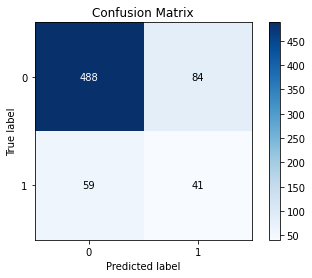

In [ ]:
# visualize confusion matrix using scikit-plot
skplt.metrics.plot_confusion_matrix(y_test, pred_result);

**Precision**

$$Precision = \frac{\text{True Positive}}{\text{True Positve} + \text{False Positive}}$$

In [ ]:
# check model precision
metrics.precision_score(y_test, pred_result)

0.328

**Recall**

$$Recall = \frac{\text{True Positive}}{\text{True Positive} + \text{False Negative}}$$

In [ ]:
# check model recall
metrics.recall_score(y_test, pred_result)

0.41

**F1-Score**

$$F_{1} = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$

In [ ]:
# check f1_score
metrics.f1_score(y_test, pred_result)

0.3644444444444444

**Classification Report**

In [ ]:
# create classification report
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.892139,0.328000,0.787202,0.610069,0.808190
recall,0.853147,0.410000,0.787202,0.631573,0.787202
f1-score,0.872207,0.364444,0.787202,0.618326,0.796647
support,572.000000,100.000000,0.787202,672.000000,672.000000


**ROC-AUC Curve**

$$\text{False Positive Rate} = \frac{\text{False Positive}}{\text{False Positive} + \text{False Negative}}$$


In [ ]:
# generate probability prediction
pred_proba_result = clf_pf.predict_proba(X_test)

In [ ]:
# check result
pd.DataFrame(pred_proba_result).head()

,0,1
0,0.999943,0.000057
1,0.999938,0.000062
2,0.999983,0.000017
3,0.999620,0.000380
4,0.999989,0.000011


In [ ]:
# check AUC score
metrics.roc_auc_score(y_test, pred_proba_result[:,1])

0.7176923076923076

In [ ]:
# check first 10 prediction of class 1
pred_proba_result[:10,1]

array([5.67086584e-05, 6.20962739e-05, 1.70289946e-05, 3.79861865e-04,
       1.05884407e-05, 6.61950248e-04, 1.32593914e-04, 5.00328414e-05,
       1.69802876e-04, 9.97731490e-01])

**ROC Curve**

**ROC Curve Using Scikit-Learn**

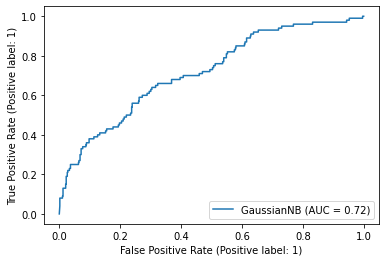

In [ ]:
metrics.RocCurveDisplay.from_estimator(clf_pf, X_test, y_test)

**ROC Curve From Scikit-Plot**

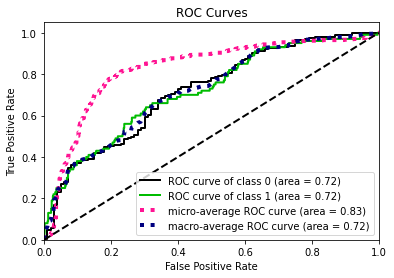

In [ ]:
skplt.metrics.plot_roc(y_test, pred_proba_result)

**Handle Imbalance Class Dataset with G-Means**

$$G_{means} = \sqrt{\text{True Positive Rate} \times \text{(1 - False Positive Rate)}}$$

where

$$\text{True Positive Rate} = \frac{\text{True Positive}}{\text{True Positive} + \text{True Negative}}$$

In [ ]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_proba_result[:,1])

In [ ]:
# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))

In [ ]:
# see gmeans result
gmeans

array([0.        , 0.1998251 , 0.22341125, 0.26434376, 0.28259536,
       0.28135536, 0.29842243, 0.29815868, 0.35834214, 0.35675303,
       0.38321423, 0.38287192, 0.43090813, 0.43013659, 0.45220903,
       0.45180292, 0.46243503, 0.46118576, 0.47155078, 0.4706973 ,
       0.49073585, 0.48401006, 0.49359534, 0.49313469, 0.50252857,
       0.50158839, 0.52872058, 0.52772768, 0.55348546, 0.55191973,
       0.56021974, 0.55702758, 0.5651598 , 0.5646182 , 0.57262736,
       0.56987301, 0.58548886, 0.58036039, 0.58794712, 0.58387421,
       0.5913124 , 0.5889424 , 0.59625873, 0.58960992, 0.59675697,
       0.59552527, 0.60257315, 0.59504069, 0.60192   , 0.59549591,
       0.6022249 , 0.60091713, 0.6075573 , 0.6049042 , 0.61144389,
       0.60942481, 0.61587393, 0.61450987, 0.62087802, 0.6181124 ,
       0.62438781, 0.61876258, 0.62491958, 0.62349119, 0.64156714,
       0.64083097, 0.65259032, 0.64352613, 0.64924647, 0.64847859,
       0.65975732, 0.65505031, 0.66057826, 0.65339351, 0.65881

In [ ]:
# find the best threshold
ix = np.argmax(gmeans)

In [ ]:
print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))

Best Threshold=0.007957745771924011, G-Mean=0.6682353339493966


In [ ]:
# change predict proba result to optimized one using new threshold
new_pred_result = (pred_proba_result[:,1] >= thresholds[ix]).astype(int)

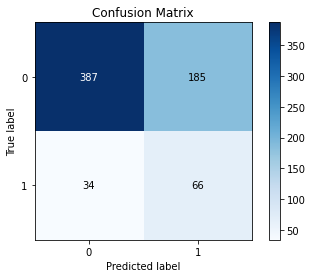

In [ ]:
# visualize confusion matrix after setting new threshold
skplt.metrics.plot_confusion_matrix(y_test, new_pred_result);

In [ ]:
# check f1-score
metrics.f1_score(y_test, new_pred_result)

0.37606837606837606

In [ ]:
# compare to the old f-1 score
metrics.f1_score(y_test, pred_result)

0.3644444444444444

In [ ]:
# check classification report result of new prediction result
pd.DataFrame(metrics.classification_report(y_test, new_pred_result, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.919240,0.262948,0.674107,0.591094,0.821577
recall,0.676573,0.660000,0.674107,0.668287,0.674107
f1-score,0.779456,0.376068,0.674107,0.577762,0.719428
support,572.000000,100.000000,0.674107,672.000000,672.000000


In [ ]:
# check classification report result of old prediction result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.892139,0.328000,0.787202,0.610069,0.808190
recall,0.853147,0.410000,0.787202,0.631573,0.787202
f1-score,0.872207,0.364444,0.787202,0.618326,0.796647
support,572.000000,100.000000,0.787202,672.000000,672.000000


Dari hasil model evaluation menunjukkan bahwa model Naive Bayes yang telah ditreshold memiliki peningkatan nilai evaluasi Response F1-Score dari 0.364 menjadi 0.376 meskipun tidak begitu signifikan. Namun hasil ini tergolong lebih tinggi dibanding nilai F1 Score pada Logistic Regression dan KNN. Hal ini menunjukkan bahwa model Naive Bayes paling layak dijadikan pilihan model baseline Machine Learning dibanding Logistic Regression dan K-Nearest Neighbors pada kasus ini.

**Jawaban**

Dari ketiga model Machine Learning yang digunakan, model Naive Bayes memiliki nilai F1-Score yang tinggi dibanding lainnya saat model evaluation. Sehingga dapat disimpulkan bahwa hasil interpretasi dari model
terbaik ada pada Naive Bayes.